In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

## Import the file
df = pd.read_csv("NHANES.csv")
df.head()


,SEQN,age_years,sex,sex_code,race_eth,poverty_ratio,WTDRD1,education_level,KCAL_AVG,PROT_AVG,TFAT_AVG,CARB_AVG,SUGR_AVG,FIBE_AVG,CHOL_AVG
0,93705.0,66.0,Female,2.0,4.0,0.82,7185.560737,2.0,1218.5,29.265,56.085,152.470,67.295,10.75,208.0
1,93708.0,66.0,Female,2.0,6.0,1.63,10825.545045,1.0,1046.5,41.905,53.505,103.815,46.105,9.70,98.5
2,93711.0,56.0,Male,1.0,6.0,5.00,9098.492517,5.0,2829.5,88.070,117.185,337.560,155.985,32.85,411.5
3,93713.0,67.0,Male,1.0,3.0,2.65,252846.565438,3.0,2103.5,66.320,87.060,276.000,174.455,16.90,166.5
4,93714.0,54.0,Female,2.0,4.0,1.86,9694.007642,4.0,1833.0,84.425,104.280,143.570,59.000,7.50,877.5


<Axes: xlabel='age_years', ylabel='Count'>

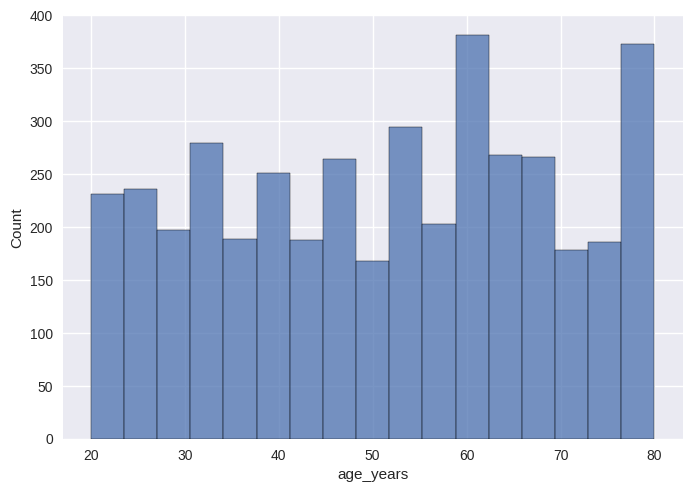

In [ ]:
## Exploratory data analysis
# 1. Histoplot to see age distribution in dataset
sns.histplot(df["age_years"])

<Axes: xlabel='count', ylabel='sex'>

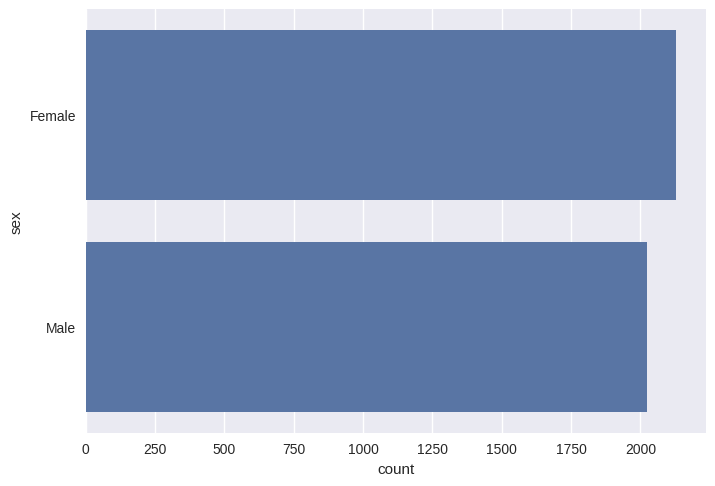

In [ ]:
## 2. Countplot to see the sex distribution
sns.countplot(df["sex"])

<Axes: xlabel='education_level', ylabel='SUGR_AVG'>

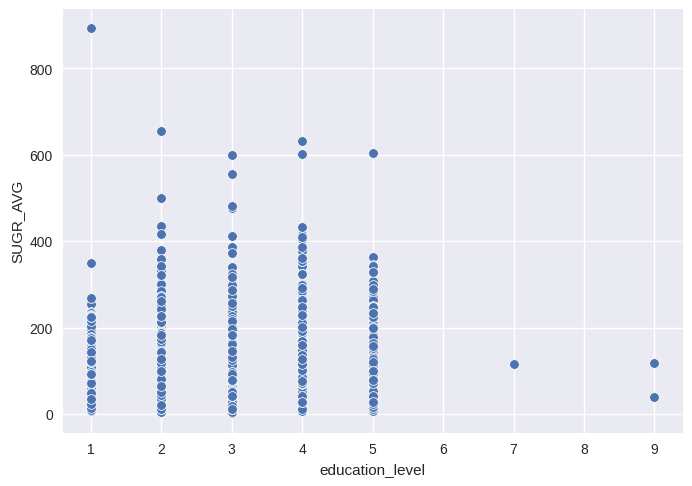

In [ ]:
# 3. Scatterplot to see the correlation of education and sugar average
sns.scatterplot(x = 'education_level', y = 'SUGR_AVG', data = df)

<Axes: >

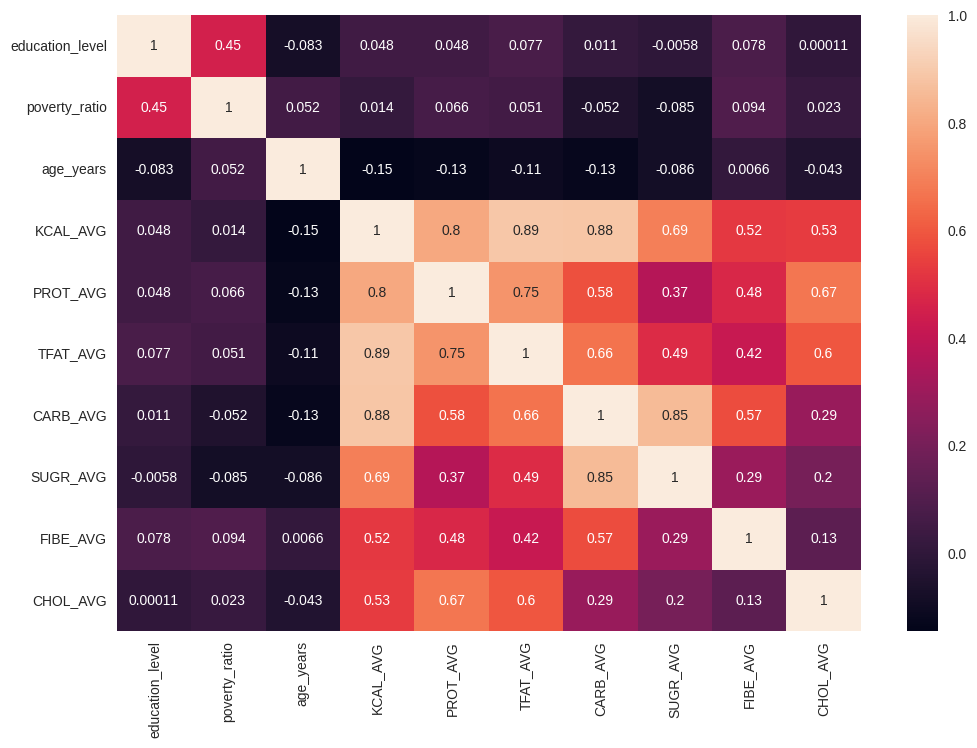

In [ ]:
## 4. HeatMap to see the correlation of all different variables
corr_vars = [
    "education_level",
    "poverty_ratio",
    "age_years",
    "KCAL_AVG",
    "PROT_AVG",
    "TFAT_AVG",
    "CARB_AVG",
    "SUGR_AVG",
    "FIBE_AVG",
    "CHOL_AVG"
]
corr = df[corr_vars].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)

In [ ]:
# Education level of person interviewed (given for adults age 20+only)
# 1 = Less than 9th grade
# 2 = 9th to 11th grade (including 12th grade with no diploma)
# 3 = High school graduate (including GED)
# 4 = Some college or associate's degree
# 5 = College graduate or above
# 7 = Refused
# 9 = Don't know

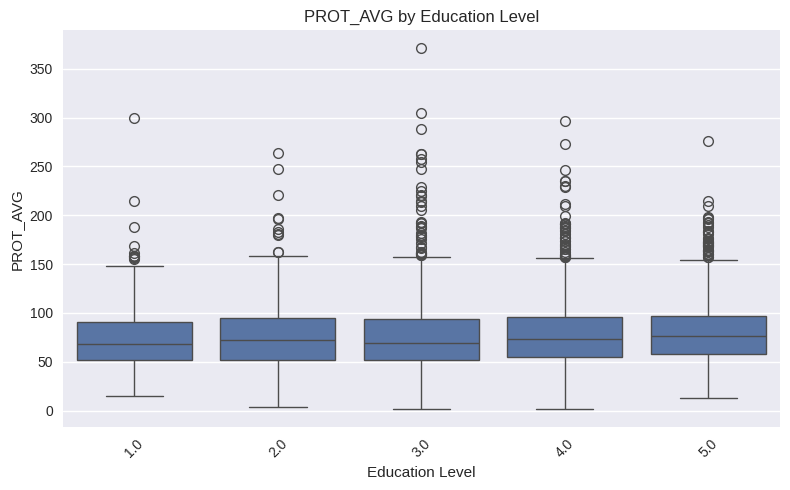

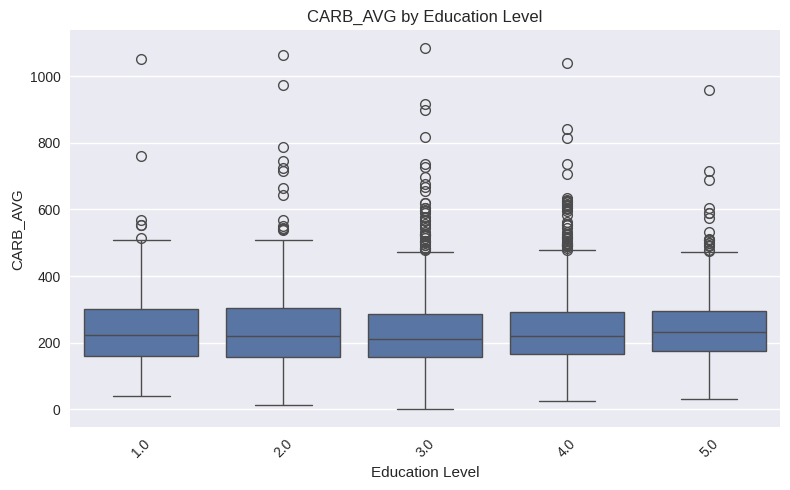

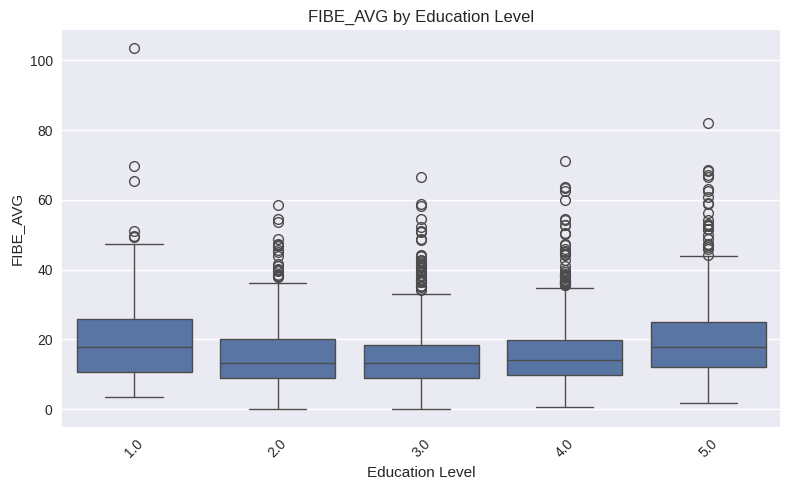

In [ ]:
##5. Data correlation of protein, carbohydrate and fiber with education level
nutrients = ["PROT_AVG", "CARB_AVG", "FIBE_AVG"]

plt.style.use("seaborn-v0_8")

for col in nutrients:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df[df["education_level"].isin([1, 2, 3, 4, 5])], # code 7 and 9 are dropped from dataset as they dont provide much insight to our objective
    x="education_level",
    y=col)
    plt.title(f"{col} by Education Level")
    plt.xlabel("Education Level")
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
# 6. Advnace data analysis with TDA
from kmapper import jupyter
import kmapper as km
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# ---- SELECT FEATURES ----
features = [
    "KCAL_AVG",
    "TFAT_AVG",
    "CARB_AVG",
    "SUGR_AVG",
    "FIBE_AVG",
    "CHOL_AVG",
    "education_level",
    "poverty_ratio"
]

X = df[features].dropna().values

# ---- SCALE DATA ----
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ---- INITIALIZE MAPPER ----
mapper = km.KeplerMapper(verbose=1)

# ---- PROJECTION (PCA 2-D) ----
projected = mapper.fit_transform(
    X_scaled,
    projection=PCA(n_components=2)
)

# ---- CREATE GRAPH ----
graph = mapper.map(
    projected,
    X_scaled,
    clusterer=DBSCAN(),
    cover=km.Cover(n_cubes=10, perc_overlap=0.2)
)

# ---- VISUALIZE (COLOR BY EDUCATION) ----
mapper.visualize(
    graph,
    path_html="nutrition_education_mapper.html",
    title="Nutrition + Education + Poverty",
    color_values=df["education_level"].values[:len(X_scaled)],
    color_function_name="Education Level");



KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=2)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (4152, 8)

..Projecting data using: 
	PCA(n_components=2)


..Scaling with: MinMaxScaler()

Mapping on data shaped (4152, 8) using lens shaped (4152, 2)

Creating 100 hypercubes.

Created 168 edges and 60 nodes in 0:00:00.260234.
Wrote visualization to: nutrition_education_mapper.html


In [ ]:
# Classification model to make prediction of education level using the macronutrients
# Model 1: Decision Tree Classifier
# Train a Single Decision Tree Model using Decision Tree Classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
df["edu_binary"] = df["education_level"].apply(lambda x: 1 if x >= 3 else 0)


In [ ]:
features = [
    "age_years", "sex_code", "race_eth", "poverty_ratio",
    "KCAL_AVG", "PROT_AVG", "TFAT_AVG", "CARB_AVG",
    "SUGR_AVG", "FIBE_AVG", "CHOL_AVG"
]

X = df[features]
y = df["edu_binary"]

In [ ]:
# Train/ Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
dt = DecisionTreeClassifier(
    # criterion="gini",
    # splitter="best",
    # max_depth=None,
    # min_samples_split=2,
    # min_samples_leaf=1
)

In [ ]:
dt.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

In [ ]:
predictions = dt.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.35      0.37      0.36       223
           1       0.86      0.85      0.86      1023

    accuracy                           0.77      1246
   macro avg       0.61      0.61      0.61      1246
weighted avg       0.77      0.77      0.77      1246



In [ ]:
print(confusion_matrix(y_test, predictions))

[[ 82 141]
 [151 872]]


In [ ]:
# The resuts here shows that the data here is imbalanced with 223 people with low education and 1023 with higher education
# The Decison tree performs well for the high education participants as there is 86% recall compared to 35% with low educated group.
# Low-education participants do not show strong or consistent patterns in nutrition that the model can easily recognize.
# This suggests that dietary patterns in the low-education group are more variable, which aligns with public-health research showing that individuals with lower socioeconomic status experience more diverse constraints affecting diet quality.

In [ ]:
# Model 2:  Random Forest Model using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 300)
print(rfc)

RandomForestClassifier(n_estimators=300)


In [ ]:
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
predictions = rfc.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.60      0.23      0.33       223
           1       0.85      0.97      0.91      1023

    accuracy                           0.83      1246
   macro avg       0.73      0.60      0.62      1246
weighted avg       0.81      0.83      0.80      1246



In [ ]:
print(confusion_matrix(y_test, predictions))

[[ 51 172]
 [ 34 989]]


In [ ]:
# The resuts here shows that the data here is imbalanced with 223 people with low education and 1023 with higher education
# The Random Forest performs well for the high education participants as there is 98% recall compared to 20% with low educated group.
# Low-education participants do not show strong or consistent patterns in nutrition that the model can easily recognize.
# This suggests that dietary patterns in the low-education group are more variable, which aligns with public-health research showing that individuals with lower socioeconomic status experience more diverse constraints affecting diet quality.
# High-educated group exhibit consistent nutritional patterns, particularly in protein and fiber intake, that are easier for the model to learn.